In [1]:
import finesse
import numpy as np
import matplotlib.pyplot as plt
import math
from finesse.knm import Map
from finesse.utilities.maps import circular_aperture
from finesse.plotting import plot_field

In [2]:
c=299792458

def intensity(int_init,f,R,d):
    r = R**(1/2)
    phi = 4*np.pi*f*d/c
    F = np.pi*r**(1/2)/(1-r)
    int_max = int_init/(1-r)**2
    intensity = int_max/(1+((2*F/np.pi)**2)*(np.sin(phi/2)**2))
    return intensity

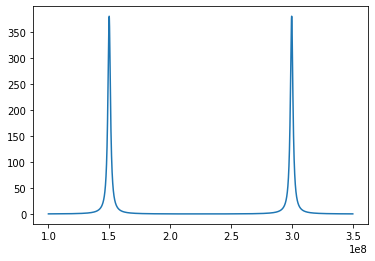

In [3]:
freq=np.arange(100000000,350000000,100)
plt.plot(freq,intensity(1,freq,0.9,1))

In [59]:
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    var phii 0
    
    # Add a Laser named L0 with a power of 1 W.
    l L0 P=1

    # Space attaching L0 <-> m1 with length of 0 m (default).
    s s0 L0.p1 m1.p1

    # Input mirror of cavity.
    m m1 R=0.8 L=0 phi=&phii

    # Intra-cavity space with length of 1 m.
    s CAV m1.p2 m2.p1 L=1

    # End mirror of cavity.
    m m2 R=0.8 L=0 phi=0

    # Power detectors on reflection, circulation and transmission.
    pd refl m1.p1.o
    pd trans m2.p2.o
    pd circ m2.p1.o

    # Scan over the detuning DOF of m1 from -180 deg to +180 deg with 400 points.
    xaxis(phii, lin, -220, 220, 400)
    """
)
out = kat.run()
#out.plot(logy=True);
#print('transmitted power is',out['trns'])
#print('reflected power is',out['refl'])

#print('circulating power is',out['m2in'])

Text(0, 0.5, 'Circulating Power (W)')

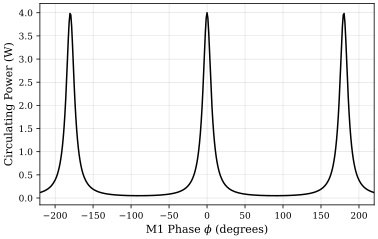

In [63]:
#print('transmitted power is',out['trns'])
#print('reflected power is',out['refl'])

#print('power into m2 is',out['m2in'])
#print('power reflected by m2 is',out['m2refl'])
#print('power into m1 is',out['m1in'])
#print('power reflected by m1 is',out['m1refl'])
#print('power source into m1 is',out['m1source'])


#print('calculated circulating intensity is', intensity(1,c,0.25,1))
#print('reflection m1 is', (out['m1refl']-out['m1source']-out['refl'])/out['m1in'])
#print('reflection m2 is', out['m2refl']/out['m2in'])

plt.plot(out.x[0],out['circ'],'k')
#plt.legend(['Transmitted','Reflected'])
plt.xlabel('M1 Phase $\phi$ (degrees)')
plt.ylabel('Circulating Power (W)')

### Increasing the reflectivities of both mirrors (while keeping both the same) increase the circulating power. Circulated power increases as R increases, regardless of impedance matching.

In [74]:
kat = finesse.Model()
kat.parse(
    """
    var phii 0
    
    # Add a Laser named L0 with a power of 1 W.
    l L0 P=1

    s s0 L0.p1 bs.p1
    bs bs T=0.5 L=0 alpha=45

    s spacex bs.p2 m1.p1 L=10
    m m1 R=1 L=0 phi=&phii

    # Intra-cavity space with length of 1 m.
    s spacey bs.p3 m2.p1 L=10

    m m2 R=1 L=0 phi=0

    # Power detectors on reflection, circulation and transmission.
    pd signal bs.p4.o
    pd reflected bs.p1.o
    
    # Scan over the detuning DOF of m1 from -180 deg to +180 deg with 400 points.
    xaxis(phii, lin, -220, 220, 400)
    """
)
out = kat.run()
#out.plot(logy=True);
#print('transmitted power is',out['trns'])
#print('reflected power is',out['refl'])

#print('circulating power is',out['m2in'])

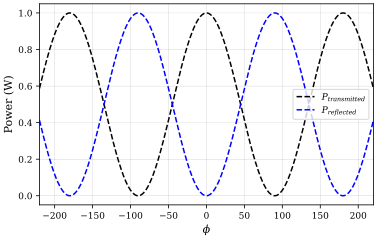

In [75]:
plt.plot(out.x[0],out['signal'],'--k')
plt.plot(out.x[0],out['reflected'],'--')
#plt.legend(['Transmitted','Reflected'])
plt.xlabel('$\phi$')
plt.ylabel('Power (W)')
plt.legend(['$P_{transmitted}$','$P_{reflected}$'])

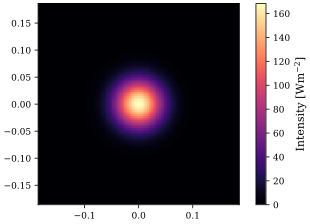

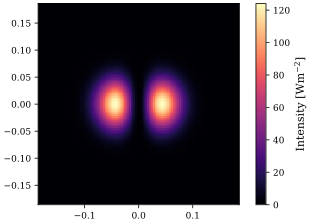

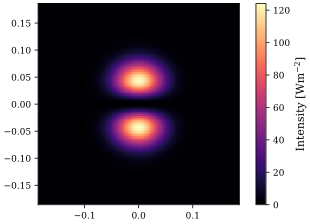

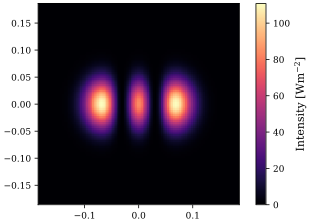

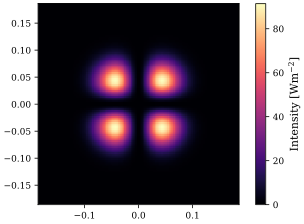

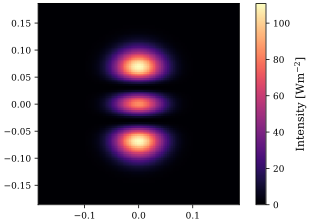

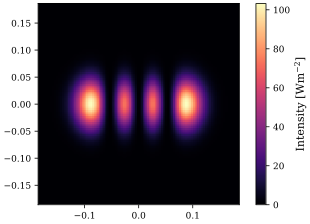

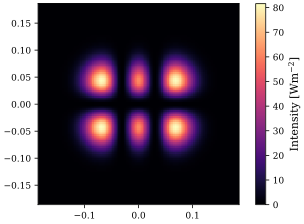

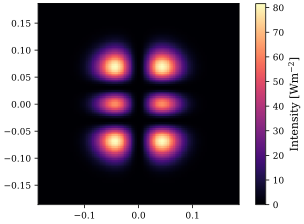

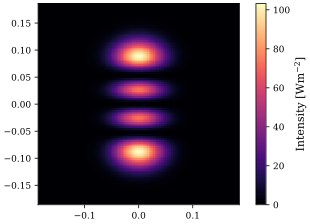

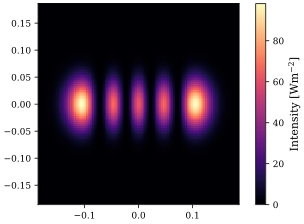

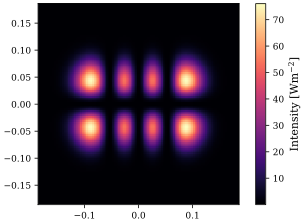

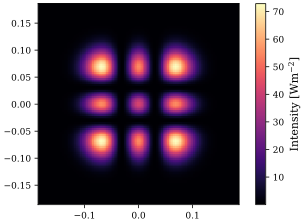

In [179]:
for i in range(13):
    plot_field(
        model.homs,
        sol["c0"].eigvectors[:,i],
        model.cavity.source.q
    )


In [14]:
kat = finesse.Model()
kat.parse(
    """
    ###########################################################################
    ###   Variables
    ###########################################################################
    var Larm 4000
    var Mtm  74.1      
    var itmT 0.01397   
    var lmichx 4.45
    var lmichy 4.45
    var phix 180

    ###########################################################################
    ###   Input optics
    ###########################################################################
    l L0 500
    s l_in L0.p1 prm.p1
    # Power recycling mirror
    m prm T=0.027 L=2e-05 phi=90
    s prc prm.p2 bs.p1 L=53


    # Central beamsplitter
    bs bs T=0.5 L=0 alpha=45

    ###########################################################################
    ###   X arm
    ###########################################################################
    s lx bs.p3 itmxar.p1 L=&lmichx
    
    m itmxar T=1 L=0 phi=180
    s ar_thick itmxar.p2 itmx.p1 L=0
    m itmx T=&itmT L=20u phi=180
    s LX itmx.p2 etmx.p1 L=&Larm
    
    m etmx T=0 L=40u phi=179.99

    pendulum itmx_sus itmx.mech mass=&Mtm fz=1 Qz=1M
    pendulum etmx_sus etmx.mech mass=&Mtm fz=1 Qz=1M

    ###########################################################################
    ###   Y arm
    ###########################################################################
    s ly bs.p2 itmyar.p1 L=&lmichy
    
    m itmyar T=1 L=0 phi=90
    s ar_thicky itmyar.p2 itmy.p1 L=0
    m itmy T=&itmT L=20u phi=90
    s LY itmy.p2 etmy.p1 L=&Larm
    
    m etmy T=0 L=40u phi=90.01

    pendulum itmy_sus itmy.mech mass=&Mtm fz=1 Qz=1M
    pendulum etmy_sus etmy.mech mass=&Mtm fz=1 Qz=1M
    

    # ------------------------------------------------------------------------------
    # Detectors
    # ------------------------------------------------------------------------------
    
    pd P_PRC bs.p1.o
    pd P_BS bs.p1.i
    pd P_in L0.p1.o
    pd P_armX bs.p2.o
    pd P_armY bs.p3.o
    pd P_SRC bs.p4.o
    pd P_refl prm.p1.o
    

    pd x2in bs.p1.i
    pd x2out bs.p1.o
    pd x1in prm.p2.i
    pd x1out prm.p2.o
    
    xaxis(etmx.phi,lin,179.75,180.25,1000)
    
    """
)
out=kat.run()

#print('transmitted power is', out['P_SRC'])
#print('power input is', out['P_in'])
#print('reflected power is',out['P_refl'])

## Transfer function

9503.205474592225 481 179.9905


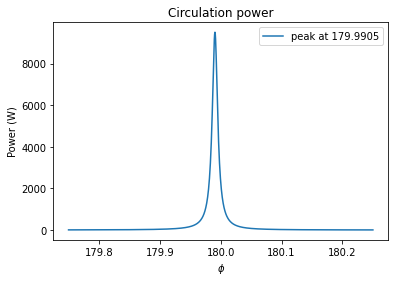

In [27]:
plt.plot(out.x[0],out['P_armX'])
plt.xlabel('$\phi$')
plt.ylabel('Power (W)')
plt.title('Circulation power')
plt.legend(['peak at 179.9905'])
print(max(out['P_armX']),np.argmax(out['P_armX']),out.x[0][481])

## Want to minimise reflected power at the power recycling mirror

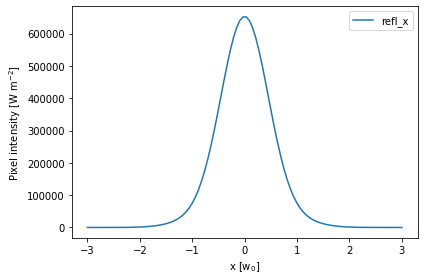

In [5]:
model = finesse.Model()
model.parse("""
l L0 P=1
s s0 L0.p1 ITM.p1 L=1
m ITM R=0.99 T=0.01
gauss gL0 L0.p1.o q=(-2+3j)

# A CCDScanLine detecting x in [-3, 3] with y = 0 by default
ccdline refl_x ITM.p1.o xlim=3 npts=100

modes(maxtem=2)
"""
)

out = model.run()
out.plot();

In [78]:
kat_dcvrm = finesse.Model()

kat_dcvrm.parse(
    """
    ###########################################################################
    ###   Variables
    ###########################################################################
    var Larm 4000
    var Mtm  74.1
    var itmT 0.01397
    var lmichx 4.5
    var lmichy 4.45

    ###########################################################################
    ###   Input optics
    ###########################################################################
    l L0 500
    s l_in L0.p1 prm.p1
    # Power recycling mirror
    m prm T=0.03 L=2e-05 phi=90
    s prc prm.p2 bs.p1 L=53


    # Central beamsplitter
    bs bs T=0.5 L=0 alpha=45

    ###########################################################################
    ###   X arm
    ###########################################################################
    s lx bs.p3 itmxar.p1 L=&lmichx
    
    m itmxar T=1 L=0 phi=180
    s ar_thick itmxar.p2 itmx.p1 L=0
    m itmx T=&itmT L=20u phi=180
    s LX itmx.p2 etmx.p1 L=&Larm
    
    m etmx T=5u L=20u phi=179.99999

    pendulum itmx_sus itmx.mech mass=&Mtm fz=1 Qz=1M
    pendulum etmx_sus etmx.mech mass=&Mtm fz=1 Qz=1M

    ###########################################################################
    ###   Y arm
    ###########################################################################
    s ly bs.p2 itmyar.p1 L=&lmichy
    
    m itmyar T=1 L=0 phi=90
    s ar_thicky itmyar.p2 itmy.p1 L=0
    m itmy T=&itmT L=20u phi=90
    s LY itmy.p2 etmy.p1 L=&Larm
    
    m etmy T=5u L=20u phi=90.00001

    pendulum itmy_sus itmy.mech mass=&Mtm fz=1 Qz=1M
    pendulum etmy_sus etmy.mech mass=&Mtm fz=1 Qz=1M
    
    ###########################################################################
    ###   vSRM
    ###########################################################################
    
    #m srm T=0.2 L=37.5u phi=-90
    
    s src bs.p4 SRC_BS.p1 L=354
    bs SRC_BS T=0.5 L=0 alpha=45
    s vSRC1 SRC_BS.p2 vSRM1.p1
    m vSRM1 T=0 L=0 phi=-83.6435
    s vSRC2  SRC_BS.p3 vSRM2.p1
    m vSRM2 T=0 L=0 phi=-6.3565
   
    ###########################################################################
    ###   Output & squeezing
    ###########################################################################
    dbs OFI 
    link(SRC_BS.p4, OFI.p1)
    readout_dc AS OFI.p3.o

    # A squeezed source could be injected into the dark port
    #sq sqz db=-30 angle=90
    #link(sqz, OFI.p2)

    # ------------------------------------------------------------------------------
    # Degrees of Freedom
    # ------------------------------------------------------------------------------
    dof STRAIN LX.dofs.h +1  LY.dofs.h -1

    # signal generator
    sgen sig STRAIN


    # ------------------------------------------------------------------------------
    # Detectors
    # ------------------------------------------------------------------------------
    qnoised NSR AS.p1.i nsr=True
    pd signal AS.p1.i 
    qnoised noise AS.p1.i nsr=False

    pd P_PRC bs.p1.o
    pd P_BS bs.p1.i
    pd P_in L0.p1.o
    pd P_armX bs.p2.o
    pd P_armY bs.p3.o
    pd P_SRC bs.p4.o

    fsig(1)
    xaxis(fsig, log, 1, 15k, 100)
    
    """
)
out2=kat_dcvrm.run()

In [79]:
kat1 = finesse.Model()
kat1.parse(
    """
    ###########################################################################
    ###   Variables
    ###########################################################################
    var Larm 4000
    var Mtm  74.1      #mass of mirror
    var itmT 0.01397   #transmission of inner mirror
    var lmichx 4.45    #length before arm cavity
    var lmichy 4.45
    var mxphi 89.999875   #phi of mirror x
    var myphi 0.000125    #phi of mirror y
    var prclen 53
    var prmT 0.03
    var prmphi 90
    var srclen 50.525
    var srmT 0.2
    var srmphi -90

    ###########################################################################
    ###   Input optics
    ###########################################################################
    l L0 500
    s l_in L0.p1 prm.p1
    # Power recycling mirror
    m prm T=&prmT L=37.5u phi=&prmphi
    s prc prm.p2 bs.p1 L=&prclen


    # Central beamsplitter
    bs bs T=0.5 L=0 alpha=45

    ###########################################################################
    ###   X arm
    ###########################################################################
    #s lx bs.p3 itmxar.p1 L=&lmichx
    #m itmxar T=1 L=0 phi=180
    #s ar_thick itmxar.p2 itmx.p1 L=0
    
    
    s lx bs.p3 itmx.p1 L=&lmichx
    m itmx T=&itmT L=37.5u phi=90
    s LX itmx.p2 etmx.p1 L=&Larm
    m etmx T=5u L=37.5u phi=&mxphi

    pendulum itmx_sus itmx.mech mass=&Mtm fz=1 Qz=1M
    pendulum etmx_sus etmx.mech mass=&Mtm fz=1 Qz=1M

    ###########################################################################
    ###   Y arm
    ###########################################################################
    #s ly bs.p2 itmyar.p1 L=&lmichy
    #m itmyar T=1 L=0 phi=90
    #s ar_thicky itmyar.p2 itmy.p1 L=0
    
    
    s ly bs.p2 itmy.p1 L=&lmichy
    m itmy T=&itmT L=37.5u phi=0
    s LY itmy.p2 etmy.p1 L=&Larm
    m etmy T=5u L=37.5u phi=&myphi

    pendulum itmy_sus itmy.mech mass=&Mtm fz=1 Qz=1M
    pendulum etmy_sus etmy.mech mass=&Mtm fz=1 Qz=1M

    ###########################################################################
    ###   Output & squeezing
    ###########################################################################
    s src bs.p4 srm.p1 L=&srclen
    m srm T=&srmT L=37.5u phi=&srmphi

    # A squeezed source could be injected into the dark port
    #sq sq1 db=0 angle=90
    #s lsqz sq1.p1 srm.p2

    # Differentially modulate the arm lengths
    fsig(1)
    dof STRAIN LX.dofs.h +1  LY.dofs.h -1
    sgen sig STRAIN


    # Output the full quantum noise limited sensitivity
    qnoised NSR_with_RP srm.p2.o nsr=True
    # Output just the shot noise limited sensitivity
    qshot NSR_without_RP srm.p2.o nsr=True

    pd P_PRC bs.p1.o
    pd P_BS bs.p1.i
    pd P_in L0.p1.o
    pd P_armX bs.p2.o
    pd P_armY bs.p3.o
    pd P_SRC bs.p4.o
    
    xaxis(fsig, log, 1, 15k, 100)
    """
)
out1=kat1.run()

/opt/anaconda3/envs/finesse3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/envs/finesse3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


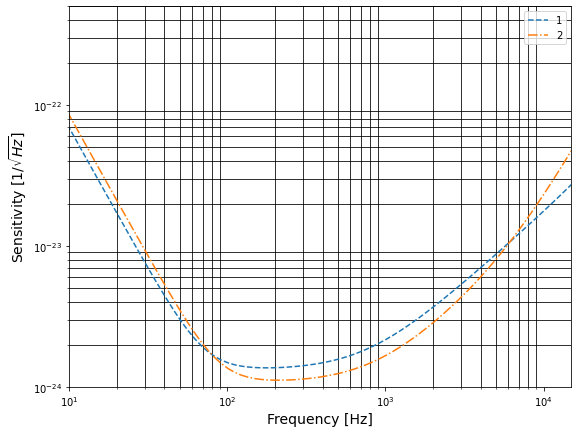

Input laser power 1: 500.0 W
PRC 1: 21.21543981693759 kW
Laser power incident on BS 1: 21.70434748578696 kW
X-arm cavity power 1: 0.010852177421311391 MW
Y-arm cavity power 1: 0.010852177421311391 MW
SRC 1: 0.00919647585607132 W
Peak sensitvity 1: 1.3673024268809645e-24 1/rt Hz
Peak sensitivity frequency 1: 179.9240755210385

Input laser power 2: 500.0 W
PRC 2: 32.292951919021775 kW
Laser power incident on BS 2: 32.70943363775609 kW
X-arm cavity power 2: 0.016354716854544375 MW
Y-arm cavity power 2: 0.016354716854544375 MW
SRC 2: 8.917000168213086e-05 W
Peak sensitvity 2: 1.1174493033524075e-24 1/rt Hz
Peak sensitivity frequency 2: 218.0776231370095


In [85]:
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
ax.plot(out1.x[0], out1['NSR_with_RP'],'--',label='1')
ax.plot(out2.x[0], out2['NSR'],'-.',label='2')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_axisbelow(True)
ax.grid(visible=True,which='minor', color='k', linestyle='-')
ax.legend()
ax.set_ylim(1E-24,5E-22)
ax.set_xlim(10,15000)
ax.set_xlabel('Frequency [Hz]',fontsize=14)
ax.set_ylabel("Sensitivity [1/$\sqrt{Hz}$]",fontsize=14)
#plt.savefig('Unoptimised_HF.eps')
plt.show(fig)

print('Input laser power 1:',np.max(np.abs(out1['P_in'])),'W')
print('PRC 1:',np.max(np.abs(out1['P_PRC']))*1e-3,'kW')
print('Laser power incident on BS 1:',np.max(np.abs(out1['P_BS']))*1e-3,'kW')
print('X-arm cavity power 1:',np.max(np.abs(out1['P_armX']))*1e-6,'MW')
print('Y-arm cavity power 1:',np.max(np.abs(out1['P_armY']))*1e-6,'MW')
print('SRC 1:',np.max(np.abs(out1['P_SRC'])),'W')
print('Peak sensitvity 1:',np.min(np.abs(out1['NSR_with_RP'])),'1/rt Hz')
print('Peak sensitivity frequency 1:',out1.x[0][np.argmin(out1['NSR_with_RP'])])
print('')
print('Input laser power 2:',np.max(np.abs(out2['P_in'])),'W')
print('PRC 2:',np.max(np.abs(out2['P_PRC']))*1e-3,'kW')
print('Laser power incident on BS 2:',np.max(np.abs(out2['P_BS']))*1e-3,'kW')
print('X-arm cavity power 2:',np.max(np.abs(out2['P_armX']))*1e-6,'MW')
print('Y-arm cavity power 2:',np.max(np.abs(out2['P_armY']))*1e-6,'MW')
print('SRC 2:',np.max(np.abs(out2['P_SRC'])),'W')
print('Peak sensitvity 2:',np.min(np.abs(out2['NSR'])),'1/rt Hz')
print('Peak sensitivity frequency 2:',out2.x[0][np.argmin(out2['NSR'])])

In [ ]:
###########################################################################
    ###   Input optics
    ###########################################################################
    l L0 500
    s l_in L0.p1 prm.p1
    # Power recycling mirror
    m prm T=&prmT L=&prmL phi=&prmphi
    s prc prm.p2 bs.p1 L=&prclen


    # Central beamsplitter
    bs bs T=0.5 L=0 alpha=45

    ###########################################################################
    ###   X arm
    ###########################################################################
    #s lx bs.p3 itmxar.p1 L=&lmichx
    #m itmxar T=1 L=0 phi=180
    #s ar_thick itmxar.p2 itmx.p1 L=0
    
    
    s lx bs.p3 itmx.p1 L=&lmichx
    m itmx T=&itmTx L=&itmLx phi=&itmphix
    s LX itmx.p2 etmx.p1 L=&Larm
    m etmx T=&etmTx L=&etmLx phi=&etmphix

    pendulum itmx_sus itmx.mech mass=&Mtm fz=1 Qz=1M
    pendulum etmx_sus etmx.mech mass=&Mtm fz=1 Qz=1M

    ###########################################################################
    ###   Y arm
    ###########################################################################
    #s ly bs.p2 itmyar.p1 L=&lmichy
    #m itmyar T=1 L=0 phi=90
    #s ar_thicky itmyar.p2 itmy.p1 L=0
    
    
    s ly bs.p2 itmy.p1 L=&lmichy
    m itmy T=&itmTy L=&itmLy phi=&itmphiy
    s LY itmy.p2 etmy.p1 L=&Larm
    m etmy T=&etmTy L=&etmLy phi=&etmphiy

    pendulum itmy_sus itmy.mech mass=&Mtm fz=1 Qz=1M
    pendulum etmy_sus etmy.mech mass=&Mtm fz=1 Qz=1M

    ###########################################################################
    ###   Output
    ###########################################################################
    s src bs.p4 srm.p1 L=&srclen
    m srm T=&srmT L=&srmL phi=&srmphi

    fsig(1)
    dof STRAIN LX.dofs.h +1  LY.dofs.h -1
    sgen sig STRAIN


    qnoised NSR srm.p2.o nsr=True